<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Rodrigo Martínez Gallardo Bertoldi
- Pablo Alejandro Rivera Sánchez

**Fecha:** 4 de mayo del 2021.

**Expediente** : 
- 
- 722268
- 721005
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase 24.

[Liga al repositorio](https://github.com/rodrigomart1nez/ProyectoConjunto_RMartinez_PRivera)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

# Tarea
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

### _Solución Rodrigo._

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [4]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [10]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_msft = closes.loc[:,'MSFT']
closes_msft

Date
2017-01-03     58.538
2017-01-04     58.276
2017-01-05     58.276
2017-01-06     58.782
2017-01-09     58.595
               ...   
2021-04-28    254.560
2021-04-29    252.510
2021-04-30    252.180
2021-05-03    251.860
2021-05-04    247.790
Name: MSFT, Length: 1091, dtype: float64

In [11]:
ret_msft = calc_daily_ret(closes_msft)

In [12]:
pd.set_option('display.max_rows', 10)

msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry').sort_index()#.head(1000)

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-05-07,212.5,put,MSFT210507P00212500,...,2021-05-04 20:00:02,2021-05-04 19:38:21,"{'contractSymbol': 'MSFT210507P00212500', 'str..."
2021-05-07,310.0,call,MSFT210507C00310000,...,2021-05-04 20:00:02,2021-05-03 18:19:38,"{'contractSymbol': 'MSFT210507C00310000', 'str..."
2021-05-07,310.0,put,MSFT210507P00310000,...,2021-05-04 20:00:02,2021-05-04 18:22:27,"{'contractSymbol': 'MSFT210507P00310000', 'str..."
2021-05-07,235.0,call,MSFT210507C00235000,...,2021-05-04 20:00:02,2021-05-04 18:45:01,"{'contractSymbol': 'MSFT210507C00235000', 'str..."
2021-05-07,235.0,put,MSFT210507P00235000,...,2021-05-04 20:00:02,2021-05-04 19:59:45,"{'contractSymbol': 'MSFT210507P00235000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,120.0,put,MSFT230616P00120000,...,2021-05-04 20:00:02,2021-04-21 14:36:50,"{'contractSymbol': 'MSFT230616P00120000', 'str..."
2023-06-16,295.0,call,MSFT230616C00295000,...,2021-05-04 20:00:02,2021-05-03 18:58:50,"{'contractSymbol': 'MSFT230616C00295000', 'str..."
2023-06-16,295.0,put,MSFT230616P00295000,...,2021-05-04 20:00:02,2021-05-03 13:39:26,"{'contractSymbol': 'MSFT230616P00295000', 'str..."


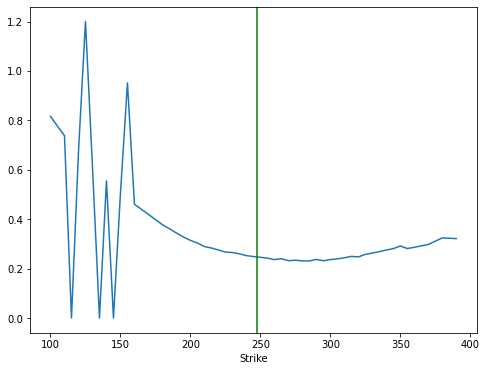

In [85]:
opt_plot = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Expiry=='2021-09-17')]

ax = opt_plot.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(opt_plot.Underlying_Price.iloc[0], color='g');

In [89]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Strike==275) & (msft_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1259,275.0,2021-09-17,call,MSFT210917C00275000,4.6,4.6,5.1,-0.99,-17.71,53.0,7367.0,0.234,MSFT,False,MSFT,247.79,2021-05-04 20:00:02,2021-05-04 18:54:04,"{'contractSymbol': 'MSFT210917C00275000', 'str..."


In [90]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            275
Expiry                                            2021-09-17 00:00:00
Type                                                             call
Symbol                                            MSFT210917C00275000
Last                                                              4.6
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  248
Quote_Time                                        2021-05-04 20:00:02
Last_Trade_Date                                   2021-05-04 18:54:04
JSON                {'contractSymbol': 'MSFT210917C00275000', 'str...
Name: 1259, Length: 19, dtype: object

In [91]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917C00275000',
 'strike': 275.0,
 'currency': 'USD',
 'lastPrice': 4.6,
 'change': -0.99000025,
 'percentChange': -17.710201,
 'volume': 53,
 'openInterest': 7367,
 'bid': 4.6,
 'ask': 5.1,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620154444,
 'impliedVolatility': 0.2339248971557617,
 'inTheMoney': False}

#### Valuación de opción europea

In [92]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [93]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

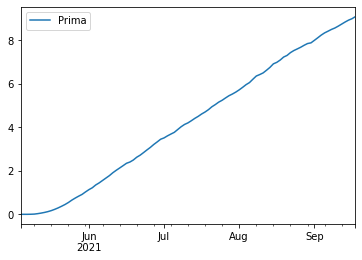

In [94]:
strike = K
call=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0).mean(axis=1)}, index=dates)
call.plot();

In [95]:
call.iloc[-1]

Prima    9.078
Name: 2021-09-17 00:00:00, dtype: float64

In [96]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(8.204291589588868, 9.952373456770468)


In [97]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917C00275000',
 'strike': 275.0,
 'currency': 'USD',
 'lastPrice': 4.6,
 'change': -0.99000025,
 'percentChange': -17.710201,
 'volume': 53,
 'openInterest': 7367,
 'bid': 4.6,
 'ask': 5.1,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620154444,
 'impliedVolatility': 0.2339248971557617,
 'inTheMoney': False}

Histograma

In [98]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_msft-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [99]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

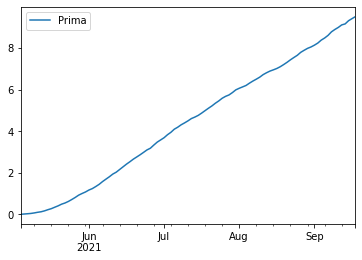

In [100]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call_hist.plot();

In [101]:
call_hist.iloc[-1]

Prima    9.504
Name: 2021-09-17 00:00:00, dtype: float64

In [102]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(8.62002058039856, 10.388117564780917)


In [103]:
opt_valuar['JSON']['lastPrice']

4.6

Valuación de opción barrera

normal

In [104]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [105]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

247.7899932861328

In [106]:
K, S0

(275.0, 247.7899932861328)

# Down-n-out CALL

* Down-and-out call: Sí $S_0>B$, $C_t^{do}=\max\{S_T-K,0\}I(S_t>B)$

In [107]:
pd.set_option('display.max_columns', 35)

# Función de desactivación (knock-out)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-04,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-05,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-06,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2021-05-07,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True
2021-09-14,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False
2021-09-15,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False
2021-09-16,False,True,True,True,True,False,False,True,False,True,True,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False


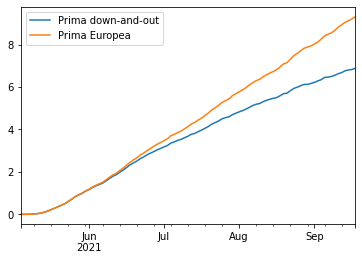

In [108]:
# Definir barrera
B = 235
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
calldo = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = calldo.plot();
call.plot(ax=ax);

In [109]:
call.iloc[-1]

Prima Europea    9.318
Name: 2021-09-17 00:00:00, dtype: float64

In [110]:
calldo.iloc[-1]

Prima down-and-out    6.887
Name: 2021-09-17 00:00:00, dtype: float64

Podemos ver que la valuación de la prima reslta ser bastante más barata que con la opción sencilla, a pesar de que resulta menos riesgosa esta opción, ya que se desactiva si baja mucho y con la opción sencilla todo lo que baje se resumiría en pérdidas; por lo tanto conviene utilizar este tipo de opciones.

# Up-n-out PUT

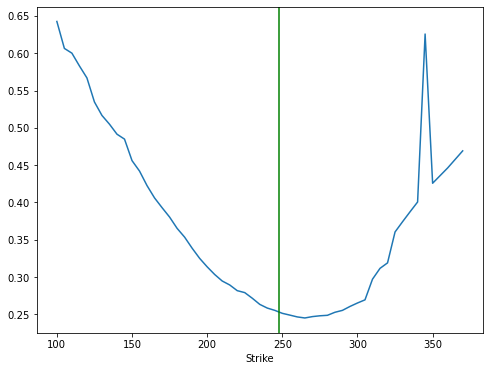

In [112]:
opt_plot = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Expiry=='2021-09-17')]

ax = opt_plot.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(opt_plot.Underlying_Price.iloc[0], color='g');

In [114]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==245) & (msft_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
977,245.0,2021-09-17,put,MSFT210917P00245000,14.1,13.4,14.0,2.1,17.5,94.0,3557.0,0.255,MSFT,False,MSFT,247.79,2021-05-04 20:00:02,2021-05-04 19:55:01,"{'contractSymbol': 'MSFT210917P00245000', 'str..."


In [115]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            245
Expiry                                            2021-09-17 00:00:00
Type                                                              put
Symbol                                            MSFT210917P00245000
Last                                                             14.1
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  248
Quote_Time                                        2021-05-04 20:00:02
Last_Trade_Date                                   2021-05-04 19:55:01
JSON                {'contractSymbol': 'MSFT210917P00245000', 'str...
Name: 977, Length: 19, dtype: object

In [116]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 14.1,
 'change': 2.1000004,
 'percentChange': 17.500002,
 'volume': 94,
 'openInterest': 3557,
 'bid': 13.4,
 'ask': 14.0,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620158101,
 'impliedVolatility': 0.2553175054931641,
 'inTheMoney': False}

#### Valuación de opción europea

In [117]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [118]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

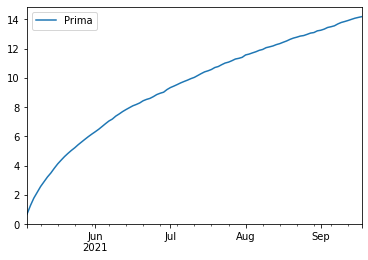

In [119]:
strike = K
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [120]:
put.iloc[-1]

Prima    14.189
Name: 2021-09-17 00:00:00, dtype: float64

In [121]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(13.306619523450607, 15.070815016116228)


In [122]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 14.1,
 'change': 2.1000004,
 'percentChange': 17.500002,
 'volume': 94,
 'openInterest': 3557,
 'bid': 13.4,
 'ask': 14.0,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620158101,
 'impliedVolatility': 0.2553175054931641,
 'inTheMoney': False}

Histograma

In [123]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_msft-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [124]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

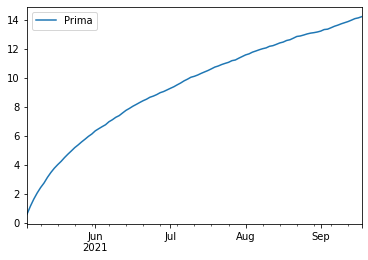

In [125]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put_hist.plot();

In [126]:
put_hist.iloc[-1]

Prima    14.208
Name: 2021-09-17 00:00:00, dtype: float64

In [127]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(13.315057776366066, 15.100080941495468)


In [128]:
opt_valuar['JSON']['lastPrice']

14.1

Valuación de opción barrera

normal

In [129]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.006/360
mu, sigma, r

(0.0013237599382196934, 0.017990847783153525, 1.6666666666666667e-05)

In [130]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_msft.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

247.7899932861328

In [131]:
K, S0

(245.0, 247.7899932861328)

* Up-and-out put: Sí $S_0<B$, $P_t^{uo}=\max\{K-S_T,0\}I(S_t<B)$

In [139]:
pd.set_option('display.max_columns', 35)
B = 260
# Función de desactivación (knock-out)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-04,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-05,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-06,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
2021-05-07,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
2021-05-10,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,...,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False
2021-09-14,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,...,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False
2021-09-15,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,...,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False
2021-09-16,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,...,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False


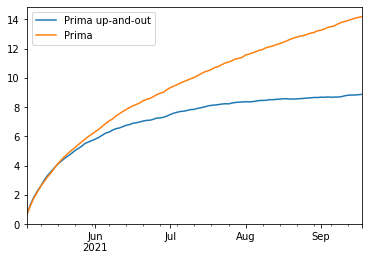

In [137]:
# Definir barrera
B = 260
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
pu = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
putuo = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = putuo.plot();
put.plot(ax=ax);

In [134]:
put.iloc[-1]

Prima    14.189
Name: 2021-09-17 00:00:00, dtype: float64

In [138]:
putuo.iloc[-1]

Prima up-and-out    8.872
Name: 2021-09-17 00:00:00, dtype: float64

De la misma manera que con la valuación anterior, podemos ver que la prima con el método de barrera es mucho más barata, casi la mitad de precio que de la opción sencilla, a pesar de que resulta menos riesgosa esta opción, ya que se desactiva si sube mucho y con la opción sencilla todo lo que suba se resumiría en pérdidas; por lo tanto conviene utilizar este tipo de opciones.

### _Solución Pablo._

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers:'Activo', start_date=None, end_date=None):
    '''
    Función que nos da los precios de cierre ajustado del activo especificado.
    '''
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes:'Precios de cierre ajustados'):
    '''
    Función que nos regresa los rendimientos diaros de los precios de cierre ajustados.
    '''
    return np.log(closes/closes.shift(1)).dropna()

Primero, vamos a obtener tanto los precios del activo elegido, en este caso Microsoft, como los rendimiento de dichos precios. Esto se hace con las funciones programadas anteriormente.

In [3]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_msft = closes.loc[:,'MSFT']
ret_msft = calc_daily_ret(closes_msft)
closes_msft

Date
2017-01-03     58.538
2017-01-04     58.276
2017-01-05     58.276
2017-01-06     58.782
2017-01-09     58.595
               ...   
2021-04-30    252.180
2021-05-03    251.860
2021-05-04    247.790
2021-05-05    246.470
2021-05-06    249.730
Name: MSFT, Length: 1093, dtype: float64

Graficamos el histórico de precios, esta gráfica nos puede ayudar a decidir nuestra barrera más adelante dependiendo del comportamiento de los precios.

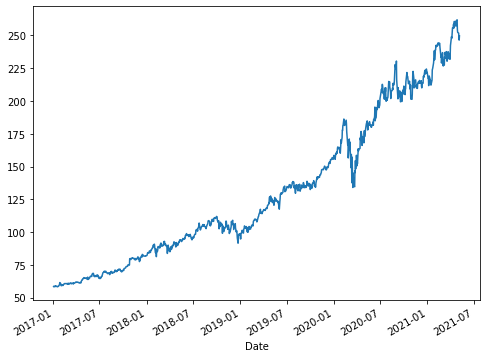

In [4]:
closes_msft.plot(figsize=(8,6));

Descargamos los datos de todas las opciones disponibles en el mercado de Microsoft.

In [5]:
pd.set_option('display.max_rows', 10)

msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-05-07,200.0,call,MSFT210507C00200000,...,2021-05-06 23:59:52,2021-05-05 19:00:24,"{'contractSymbol': 'MSFT210507C00200000', 'str..."
2021-05-07,155.0,put,MSFT210507P00155000,...,2021-05-06 23:59:52,2021-04-23 17:46:50,"{'contractSymbol': 'MSFT210507P00155000', 'str..."
2021-05-07,120.0,put,MSFT210507P00120000,...,2021-05-06 23:59:52,2021-05-03 13:30:01,"{'contractSymbol': 'MSFT210507P00120000', 'str..."
2021-05-07,120.0,call,MSFT210507C00120000,...,2021-05-06 23:59:52,2021-05-06 19:59:12,"{'contractSymbol': 'MSFT210507C00120000', 'str..."
2021-05-07,252.5,put,MSFT210507P00252500,...,2021-05-06 23:59:52,2021-05-06 19:58:56,"{'contractSymbol': 'MSFT210507P00252500', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,285.0,call,MSFT230616C00285000,...,2021-05-06 23:59:52,2021-05-06 13:52:47,"{'contractSymbol': 'MSFT230616C00285000', 'str..."
2023-06-16,285.0,put,MSFT230616P00285000,...,2021-05-06 23:59:52,2021-04-29 19:07:08,"{'contractSymbol': 'MSFT230616P00285000', 'str..."
2023-06-16,290.0,call,MSFT230616C00290000,...,2021-05-06 23:59:52,2021-05-06 16:45:37,"{'contractSymbol': 'MSFT230616C00290000', 'str..."


# Call

Vamos a calcular varias primas sobre una opción call con varios métodos y de varios tipos, es decir, de una opción call vanilla y una barrera down-and-out con varios métodos. 

Antes, tenemos que definir el strike price de nuestra opción, esto lo hacemos con base a la sonrisa de volatilidad, la cual nos grafica el strike price contra la volatilidad de la opción (obtenida de las fórmulas de Black & Scholes).


In [6]:
smile = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Expiry=='2021-10-15')]

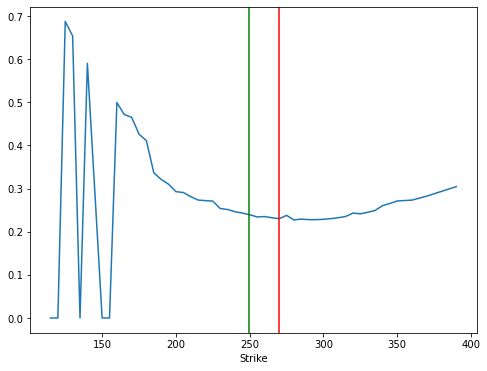

In [7]:
ax = smile.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(smile.Underlying_Price.iloc[0], color='g');
ax.axvline(270, color='r');

En este caso, elegimos un strike price de 270, esto ya que este strike price presenta una de las menores volatilidades en la sonrisa. Además, no está muy alejado del precio actual, lo cual es bueno ya que esperamos que el precio del subyacente sea mayor a nuestro srtike price para poder comprar a un precio menor al de mercado en un futuro.

In [8]:
opt_deseada = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Strike==270) & (msft_opt.Expiry=='2021-10-15')]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1234,270.0,2021-10-15,call,...,2021-05-06 23:59:52,2021-05-06 18:28:55,"{'contractSymbol': 'MSFT211015C00270000', 'str..."


In [9]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar['JSON']

{'contractSymbol': 'MSFT211015C00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 6.75,
 'change': 0.25,
 'percentChange': 3.846154,
 'volume': 28,
 'openInterest': 1579,
 'bid': 7.4,
 'ask': 7.75,
 'contractSize': 'REGULAR',
 'expiration': 1634256000,
 'lastTradeDate': 1620325735,
 'impliedVolatility': 0.23004920349121094,
 'inTheMoney': False}

Vemos que la opción Europea normal para esta opción call vale 6.75, a este valor nos queremos acercar mediante la valuación de la misma opción con el método Montecarlo.

# Valuación opción Europea

In [10]:
def valuacion_calleuropea(ret:'Rendimientos activo',
                     closes:'Precios activo',
                     tasa:'Tasa libre de riesgo',
                     optv:'Datos de la opción a valuar',
                     escenarios:'Número de escenarios a simular',
                     conf:'Nivel de confianza (0.95)'):
    '''
    Función que nos regresa la valuación de una opción vanilla
    call europea dando cierta información como argumentos.
    '''
    mu = ret.mean()
    sigma = ret.std()
    r = tasa/360
    
    from datetime import date

    # Datos de la opción y del día de actual
    today = pd.Timestamp(date.today())
    expiry = optv.Expiry

    # Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
    dates = pd.date_range(start=today, end=expiry, freq='B')

    # Cantidad de escenarios a simular para el método de montecarlo
    ndays = len(dates)
    nscen = escenarios

    K = optv.Strike
    S0 = closes.iloc[-1]
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
    sim_closes = S0*np.exp(sim_ret.cumsum())
    
    strike = K
    call=pd.DataFrame({'PrimaEuropea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0).mean(axis=1)}, index=dates)
    call.plot();
    
    confianza = conf
    sigma_est = sim_closes.iloc[-1].sem()
    mean_est = call.iloc[-1].PrimaEuropea
    i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    
    return call.iloc[-1].PrimaEuropea, i2, call

Simulamos el precio de la opción con sus respectivas características con ayuda de la función creada y obtenemos que el valor de la misma es alrededor de 15, algo alejado del valor real. Sin embargo, vamos a comprobar que las opciones barrera simuladas tienen un menor precio que esta opción vanilla simulada.

(15.465822839968256,
 (15.14922561179629, 15.782420068140222),
             PrimaEuropea
 2021-05-06     7.891e-06
 2021-05-07     1.703e-03
 2021-05-10     1.779e-02
 2021-05-11     5.620e-02
 2021-05-12     1.161e-01
 ...                  ...
 2021-10-11     1.498e+01
 2021-10-12     1.511e+01
 2021-10-13     1.524e+01
 2021-10-14     1.535e+01
 2021-10-15     1.547e+01
 
 [117 rows x 1 columns])

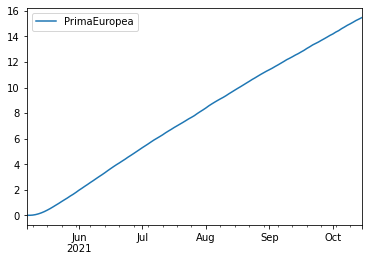

In [11]:
call = valuacion_calleuropea(ret_msft, closes_msft, 0.06, opt_valuar, 100000, 0.95)
call

# Valuación opción barrera

### Suposición de rendimientos normales

In [12]:
def valuacion_callbarrera_downout(ret:'Rendimientos activo',
                     closes:'Precios activo',
                     tasa:'Tasa libre de riesgo',
                     optv:'Datos de la opción a valuar',
                     escenarios:'Número de escenarios a simular',
                     barrera:'Precio barrera',
                     conf:'Nivel de confianza (0.95)',
                     call_europ:'Call europea a comparar'):
    mu = ret.mean()
    sigma = ret.std()
    r = tasa/360
    
    from datetime import date

    # Datos de la opción y del día de actual
    today = pd.Timestamp(date.today())
    expiry = optv.Expiry

    # Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
    dates = pd.date_range(start=today, end=expiry, freq='B')

    # Cantidad de escenarios a simular para el método de montecarlo
    ndays = len(dates) 
    nscen = escenarios

    K = optv.Strike
    S0 = optv.Underlying_Price
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
    sim_closes = S0*np.exp(sim_ret.cumsum())
    
    B = barrera
    # Crear función indicadora
    I = (sim_closes > B).cumprod(axis=0)  > 0
    
    strike = K
    callui = pd.DataFrame({'PrimaBarrera':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)     
    ax = callui.plot();
    call_europ.plot(ax=ax)
    
    confianza = conf
    sigma_est = sim_closes.iloc[-1].sem()
    mean_est = callui.iloc[-1].PrimaBarrera
    i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    
    return callui.iloc[-1].PrimaBarrera, i2



Calculamos el precio de la opción tipos call y down-and-out por medio de la función. En este caso creamos la función de activación (indicadora) correspondiente, en dónde si el valor del precio simulado supera la barrera la opción se desactiva. Dicha barrera la pusimos en 235 ya que es una down, y fue este valor ya que si el precio del subyacente llega a tocar la barrera consideraríamos que la opción ya no se podrá ejercer, el precio del subyacente probablemente ya no subirá hasta la zona de ejercicio. De igual manera, asumiríamos o con esta barrera tenemos certeza de que el precio no llegará a tocar la barrera a lo largo de su vida, esto para que la opción no se desactive y sea más barata.


(11.168130747243985, (10.851605670231779, 11.484655824256192))

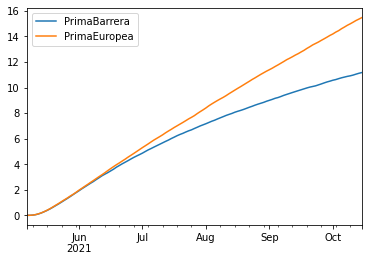

In [13]:
callb = valuacion_callbarrera_downout(ret_msft, closes_msft, 0.06, opt_valuar, 100000, 235, 0.95, call[2])
callb

Al comparar y graficar ambas primas, vemos que efectivamente la prima de la opción barrera es más barata que la prima de la opción Europea. Mientras no llegue a tocar la barrera, una opción barrera será más barata que una vanilla, es por esto que es importante definir una buena barrera.

In [14]:
call[0], callb[0]

(15.465822839968256, 11.168130747243985)

### Método del histograma

Realizamos el mismo procedimiento pero ahora, en lugar de asumir los rendimientos como normales, vamos a usar el método del histograma para generarlos con base a su distribución real.

In [15]:
mu = ret_msft.mean()
sigma = ret_msft.std()
r = 0.06/360

In [16]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

dates = pd.date_range(start = today, end = expiry, freq = 'B')

ndays = len(dates) # Número de días (t)
nscen = 100000

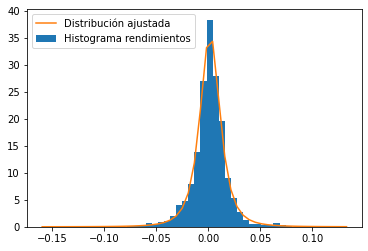

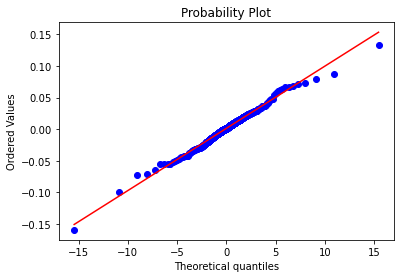

In [17]:
# rendimientos 
ren = calc_daily_ret(closes_msft) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren, bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren, sparams=params[:-2], dist=dist, plot=plt);

In [18]:
prob = y/np.sum(y) # Para tener valores entre 0 y 1, se representan como probabilidades
values = x[1:]

In [19]:
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_msft+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_msft[-1]) * np.exp(sim_ret_hist.cumsum())

In [20]:
# Creación de la función indicadora
B = 235
I = (sim_closes_hist > B).cumprod(axis=0)  > 0

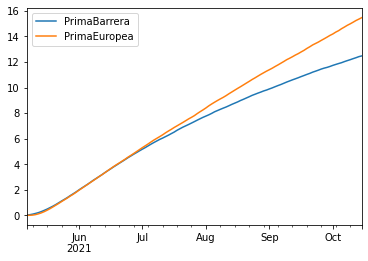

In [21]:
strike = pd.DataFrame(opt_valuar.Strike*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'PrimaBarrera':np.exp(-r*ndays) \
                          *(I * np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen)))).T.mean()}, index=dates)

ax = call_hist.plot();
call[2].plot(ax=ax);

En este caso, el precio de la opción fue más caro que el que calculamos con el método de rendimientos normales, pero sigue siendo más barato que la opción vanilla Europea que es lo que esperamos. 

In [22]:
call_hist.iloc[-1]

PrimaBarrera    12.471
Name: 2021-10-15 00:00:00, dtype: float64

# Put

Pasamos al segundo inciso a realizar la valuación de un put up-and-out. Graficamos la sonrisa de volatilidad para definir un strike price óptimo.

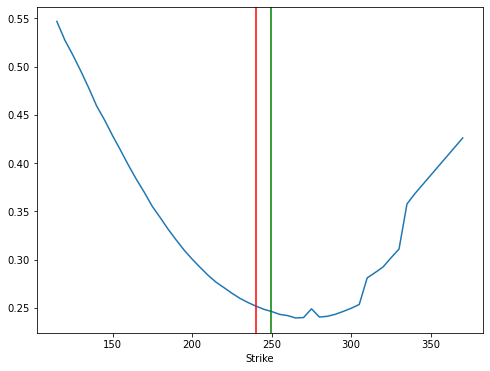

In [23]:
smile_put = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Expiry=='2021-10-15')]

ax = smile_put.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(smile_put.Underlying_Price.iloc[0], color='g');
ax.axvline(240, color='r');

En este caso, elegimos un strike price de 140 ya que nos interesa poder en un futuro vender nuestro activo en dicho precio y estamos esperando que el subyacente sea menor al strike price. De igual manera, se eligió ya que está cercano al valor actual y se sitúa en una posición baja con respecto a la volatilidad.

In [24]:
opt_deseada_put = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==240) & (msft_opt.Expiry=='2021-10-15')]
opt_deseada_put

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
947,240.0,2021-10-15,put,...,2021-05-06 23:59:52,2021-05-06 14:56:54,"{'contractSymbol': 'MSFT211015P00240000', 'str..."


In [25]:
opt_valuar2 = opt_deseada_put.loc[list(opt_deseada_put.index)[0]]
opt_valuar2['JSON']

{'contractSymbol': 'MSFT211015P00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 12.2,
 'change': -0.35000038,
 'percentChange': -2.7888477,
 'volume': 6,
 'openInterest': 2586,
 'bid': 11.5,
 'ask': 11.95,
 'contractSize': 'REGULAR',
 'expiration': 1634256000,
 'lastTradeDate': 1620313014,
 'impliedVolatility': 0.25171646728515623,
 'inTheMoney': False}

# Valuación opción Europea

Realizamos el proceso de la valuación de la opción Europa con nuestra función, esperaríamos que nos arrojará el lastprice de arriba, es decir, que el precio sea de 12.2.

In [26]:
def valuacion_puteuropea(ret:'Rendimientos activo',
                     closes:'Precios activo',
                     tasa:'Tasa libre de riesgo',
                     optv:'Datos de la opción a valuar',
                     escenarios:'Número de escenarios a simular',
                     conf:'Nivel de confianza (0.95)'):
    mu = ret.mean()
    sigma = ret.std()
    r = tasa/360
    
    from datetime import date

    # Datos de la opción y del día de actual
    today = pd.Timestamp(date.today())
    expiry = optv.Expiry

    # Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
    dates = pd.date_range(start=today, end=expiry, freq='B')

    # Cantidad de escenarios a simular para el método de montecarlo
    ndays = len(dates)
    nscen = escenarios

    K = optv.Strike
    S0 = closes.iloc[-1]
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
    sim_closes = S0*np.exp(sim_ret.cumsum())
    
    strike = K
    put=pd.DataFrame({'PrimaEuropea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
    put.plot();
    
    confianza = conf
    sigma_est = sim_closes.iloc[-1].sem()
    mean_est = put.iloc[-1].PrimaEuropea
    i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    
    return put.iloc[-1].PrimaEuropea, i2, put



Podemos ver que en este caso la valuación por medio del método de Montecarlo es más acertada que en el caso de la opción call, nos arrojó un valor muy cercano al 12.2 que esperábamos. Al igual que en la opción call, ahora vamos a valuar las opciones barrera con ambos métodos y esperaríamos que la prima de estas sea menor a la obtenida en esta simulación.

(10.936167035477444,
 (10.6197809303317, 11.252553140623188),
             PrimaEuropea
 2021-05-06         0.019
 2021-05-07         0.148
 2021-05-10         0.336
 2021-05-11         0.557
 2021-05-12         0.774
 ...                  ...
 2021-10-11        10.753
 2021-10-12        10.792
 2021-10-13        10.832
 2021-10-14        10.880
 2021-10-15        10.936
 
 [117 rows x 1 columns])

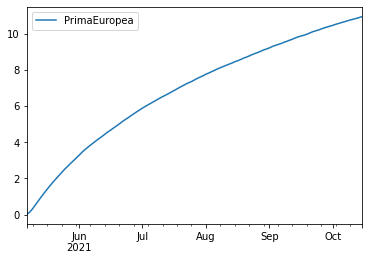

In [27]:
put = valuacion_puteuropea(ret_msft, closes_msft, 0.06, opt_valuar2, 100000, 0.95)
put

# Valuación opción barrera

### Suposición de rendimientos normales

Valuamos la opción barrera put up-and-out asumiendo rendimientos normales con la función de abajo.

In [28]:
def valuacion_putbarrera_upout(ret:'Rendimientos activo',
                     closes:'Precios activo',
                     tasa:'Tasa libre de riesgo',
                     optv:'Datos de la opción a valuar',
                     escenarios:'Número de escenarios a simular',
                     barrera:'Precio barrera',
                     conf:'Nivel de confianza (0.95)',
                     put_europ:'Call europea a comparar'):
    mu = ret.mean()
    sigma = ret.std()
    r = tasa/360
    
    from datetime import date

    # Datos de la opción y del día de actual
    today = pd.Timestamp(date.today())
    expiry = optv.Expiry

    # Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
    dates = pd.date_range(start=today, end=expiry, freq='B')

    # Cantidad de escenarios a simular para el método de montecarlo
    ndays = len(dates) 
    nscen = escenarios

    K = optv.Strike
    S0 = optv.Underlying_Price
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
    sim_closes = S0*np.exp(sim_ret.cumsum())
    
    B = barrera
    # Crear función indicadora
    I = (sim_closes < B).cumprod(axis=0)  > 0
    
    strike = K
    putui = pd.DataFrame({'PrimaBarrera':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)     
    ax = putui.plot();
    put_europ.plot(ax=ax)
    
    confianza = conf
    sigma_est = sim_closes.iloc[-1].sem()
    mean_est = putui.iloc[-1].PrimaBarrera
    i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    
    return putui.iloc[-1].PrimaBarrera, i2



En este caso, definimos la barrera por encima del spot price ya que es una opción barrera up and out. Elegimos este valor ya que está bastante separado del spot price y la creencia sería que el precio del activo subyacente no llegará a tocar la barrera y por lo tanto no se desactivará, al igual que esperaríamos que el precio del subyacente disminuya para poder ejercer la opción con una ganancia. El hecho de poner una barrera permite que la opción sea más barata mientras no se toque dicha barrera, por lo que la definición de la misma es crucial en este tipo de opciones.

Además, como suponíamos, la opción barrera, como se muestra en la gráfica, es más barata que una opción put tradicional. El cálculo fue correcto. 

(9.233661333182821, (8.918608117722606, 9.548714548643037))

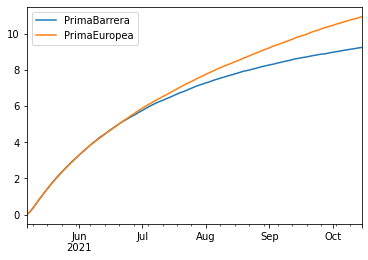

In [29]:
putb = valuacion_putbarrera_upout(ret_msft, closes_msft, 0.06, opt_valuar2, 100000, 275, 0.95, put[2])
putb

### Método del histograma

Ahora simplemente calculamos el mismo precio de la opción barrera up-and-out pero usando el método del histograma, usando los rendimiento previamente generados cuando calculamos el valor de la call.

In [30]:
B2 = 275
I2 = (sim_closes_hist < B2).cumprod(axis=0)  > 0

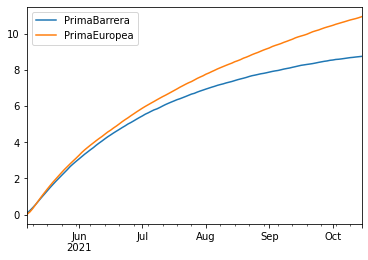

In [31]:
strike2 = pd.DataFrame(opt_valuar2.Strike*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'PrimaBarrera':np.exp(-r*ndays) \
                          *(I2 * np.fmax(strike2-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen)))).T.mean()}, index=dates)

ax2 = put_hist.plot();
put[2].plot(ax=ax2);

El precio de la barrera es igual, y vemos que por este método la opción es un poco más barata que usando el método de rendimientos normales. Ambos métodos regresan un precio de opción barrera menor al de la Europea normal. 

In [32]:
put_hist.iloc[-1]

PrimaBarrera    8.743
Name: 2021-10-15 00:00:00, dtype: float64

# Resultados finales

In [33]:
results = pd.DataFrame(data = {'Call': [opt_valuar.Last, call[0], callb[0], call_hist.iloc[-1].PrimaBarrera],
                              'Put': [opt_valuar2.Last, put[0], putb[0], put_hist.iloc[-1].PrimaBarrera]},
                      index = ['Valor Real Opc. Vanilla', 'Montecarlo Vanilla', 'Barrera (normales)', 'Barrera (hist)'])
results

,Call,Put
Valor Real Opc. Vanilla,6.750,12.200
Montecarlo Vanilla,15.466,10.936
Barrera (normales),11.168,9.234
Barrera (hist),12.471,8.743


Finalmente, podemos ver los resultados finales en la tabla anterior. Los valores de las opciones Vanilla con Montecarlo más o menos se acercaron al valor real, más con la opción put, de igual manera, vemos que efectivamente las opciones barrera son más baratas que las opciones vanilla, siendo la prima siempre menor en las simulaciones con ambos métodos. Esto nos proporciona una herramienta nueva que, si la utilizamos correctamente, nos puede ahorrar ciertos costos al momento de pagar la prima de las opciones, todo este se basaría es elegir una barrera adecuada la cual, en el caso de una out, no se llegue a tocar el precio para que la opción no se desactive antes de tiempo y podamos aprovechar el menor precio. En el caso de una in, es importante definir una barrera que se pueda alcanzar para que nuestra opción se active y la podemos ejercer, tomando en cuenta que pagamos una prima más barata comparada con una vanilla.
